1.Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [0]:
import io
from google.colab import files
import pandas
import numpy
from pymystem3 import Mystem
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import MinMaxScaler

1.Загрузить файл hr.csv.

In [4]:
uploaded = files.upload()

Saving HR.csv to HR (1).csv


In [5]:
df_upload = pandas.read_csv(io.BytesIO(uploaded['HR.csv']), sep = ',')
HR_df = df_upload.copy() # делаем копию для того что бы оставить гарантирвоанно неизмененный оригинал на всякий случай
HR_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [6]:
HR_describe = HR_df.describe(include='all')
HR_describe.loc['median'] = HR_df.median(axis=0) #добавляем медиану
HR_describe = pandas.concat([HR_describe, HR_df.mode(axis=0).T.add_prefix('mode_').T])#добавляем мультимоду (как приделать префикс к индексам строк я не понял, по этму 2 раза транспонировал)

HR_describe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999,14999,14999,14999,14999,14999,14999,14999,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.80305,201.05,3.49823,0.14461,0.238083,0.0212681,NaN,NaN
std,0.248631,0.171169,1.23259,49.9431,1.46014,0.351719,0.425924,0.144281,NaN,NaN
min,0.09,0.36,2,96,2,0,0,0,NaN,NaN
25%,0.44,0.56,3,156,3,0,0,0,NaN,NaN
50%,0.64,0.72,4,200,3,0,0,0,NaN,NaN
75%,0.82,0.87,5,245,4,0,0,0,NaN,NaN


In [7]:
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


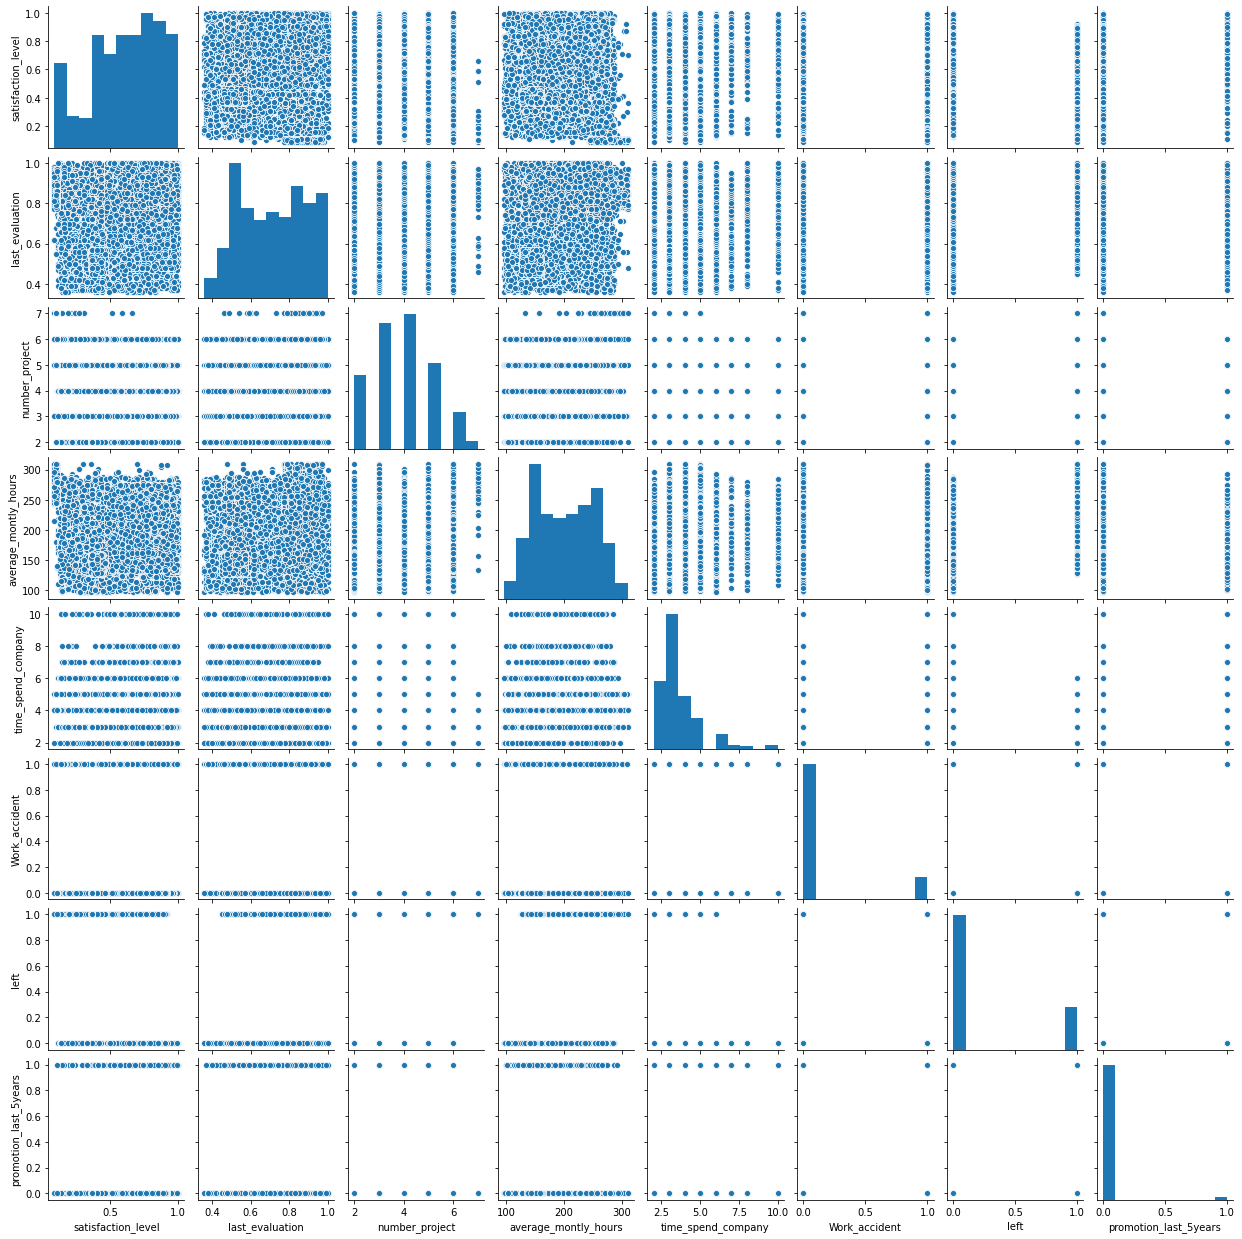

In [8]:
# построю для себя пэирплот
sns.pairplot(HR_df)
fig=plt.gcf()
fig.set_size_inches(17,17)
plt.show()

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [9]:
HR_df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


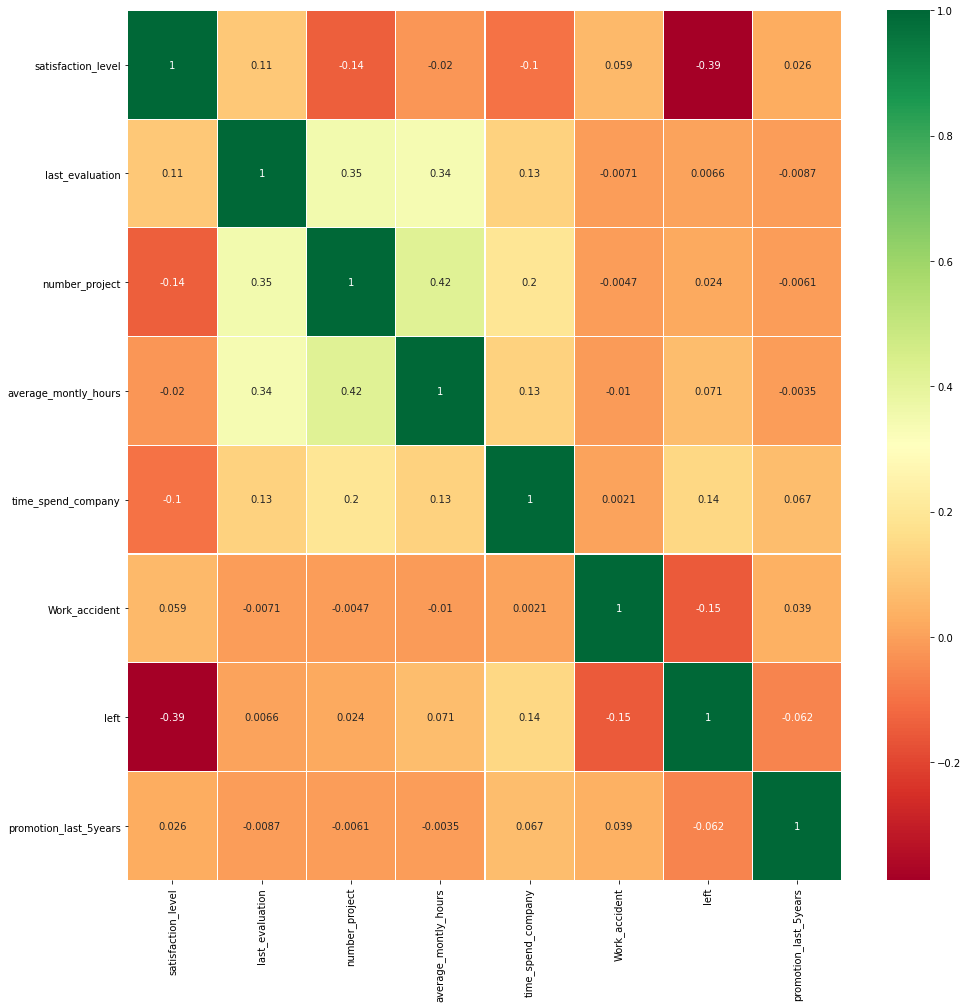

In [10]:
sns.heatmap(HR_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(16,16)
plt.show()

4.Визуализировать несколько взаимосвязей между переменными.


In [0]:
def one_on_one_plot(xxx,yyy):
  first = HR_df[xxx].fillna(0)
  second = HR_df[yyy].fillna(0)
  fig, ax = plt.subplots()
  fig.set_size_inches(17,5)
  sns.regplot(x= first, y=second, data=HR_df, fit_reg=True)
  plt.xlabel(first.name)
  plt.ylabel(second.name)
  plt.title(first.name + ' и ' + second.name)
  plt.show()
  return

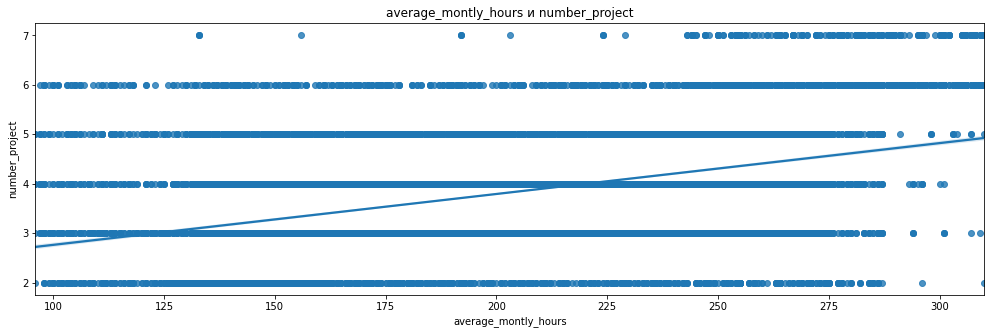

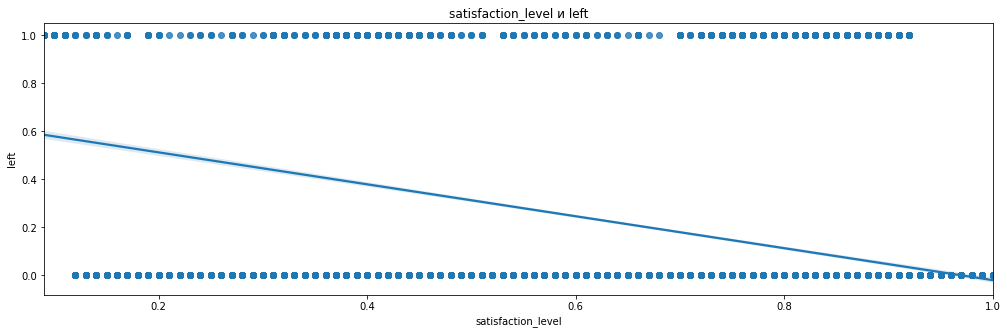

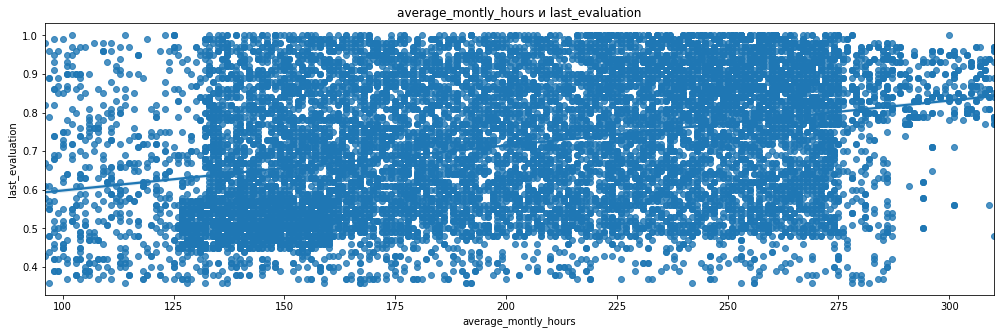

In [12]:
one_on_one_plot('average_montly_hours','number_project')
one_on_one_plot('satisfaction_level','left')
one_on_one_plot('average_montly_hours','last_evaluation')

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.


In [0]:
def titester(xxx,yyy):
  print ('Сравниваем 2 столбца:', xxx, 'и', yyy)
  print ('Сначала проверим нормальность\n', scipy.stats.shapiro(HR_df[xxx]))
  print (scipy.stats.shapiro(HR_df[yyy]))
  t,p = scipy.stats.ttest_ind(HR_df[xxx],HR_df[yyy])
  mt,mp = scipy.stats.mannwhitneyu(HR_df[xxx],HR_df[yyy])
  print ('По Стьюденту: t критерий = ', t, ', p value = ', p)
  print ('По Манну: U критерий = ', mt, ', p value = ', mp, '\n')
  return


In [14]:
# визуально нормальных выборок у нас нет.. кореляция между столбами не высокая, что делать непонятно. Будем фигачить ти тест по максимально похожим и заодно пройдемся по манну, хотя он для небольших выборок.
# help(scipy.stats.ttest_ind)
titester('average_montly_hours','number_project')
titester('satisfaction_level','last_evaluation')
titester('average_montly_hours','last_evaluation')

Сравниваем 2 столбца: average_montly_hours и number_project
Сначала проверим нормальность
 (0.963361382484436, 0.0)
(0.9216642379760742, 0.0)
По Стьюденту: t критерий =  483.54229603425085 , p value =  0.0
По Манну: U критерий =  0.0 , p value =  0.0 

Сравниваем 2 столбца: satisfaction_level и last_evaluation
Сначала проверим нормальность
 (0.9518948793411255, 0.0)
(0.9522111415863037, 0.0)
По Стьюденту: t критерий =  -41.89868154070206 , p value =  0.0
По Манну: U критерий =  87752858.0 , p value =  7.222866035904297e-239 

Сравниваем 2 столбца: average_montly_hours и last_evaluation
Сначала проверим нормальность
 (0.963361382484436, 0.0)
(0.9522111415863037, 0.0)
По Стьюденту: t критерий =  491.25647025928 , p value =  0.0
По Манну: U критерий =  0.0 , p value =  0.0 



/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Очевидно получается полная фигня и данные не сравнимы по p значению и не связаны по критериям провеки.

6.Рассчитать сколько работников работает в каждом департаменте.

In [15]:
sotrudnikator = pandas.pivot_table(HR_df, values='salary', index='sales', aggfunc='count')
del sotrudnikator.index.name
sotrudnikator

,salary
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229
technical,2720


7.Показать распределение сотрудников по зарплатам.


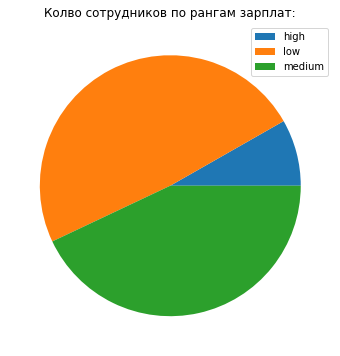

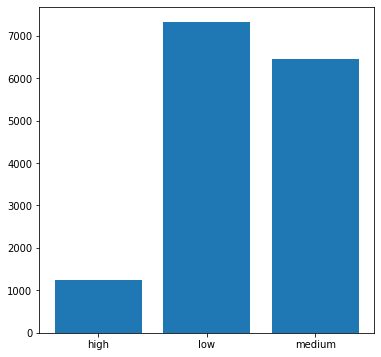

        sales
high     1237
low      7316
medium   6446


In [16]:
sotrudnikator = pandas.pivot_table(HR_df, values='sales', index='salary', aggfunc='count')
del sotrudnikator.index.name
plt.figure(figsize=(6, 6))
plt.title('Колво сотрудников по рангам зарплат:')
plt.pie(sotrudnikator['sales'])
plt.legend(sotrudnikator.T.keys())
plt.show()
plt.figure(figsize=(6, 6))
plt.bar(range(len(sotrudnikator['sales'])),sotrudnikator['sales'],tick_label=sotrudnikator.T.keys())
plt.show()
print(sotrudnikator)

8.Показать распределение сотрудников по зарплатам совместно с департаментами.


sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


<Figure size 720x720 with 0 Axes>

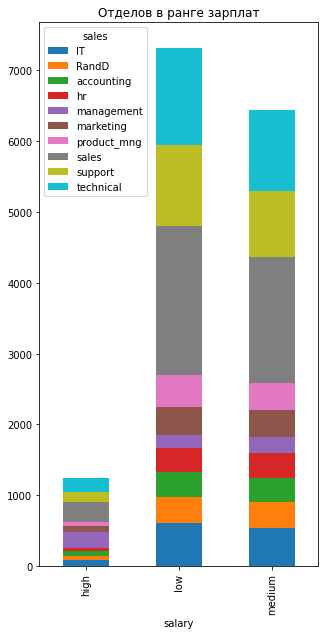

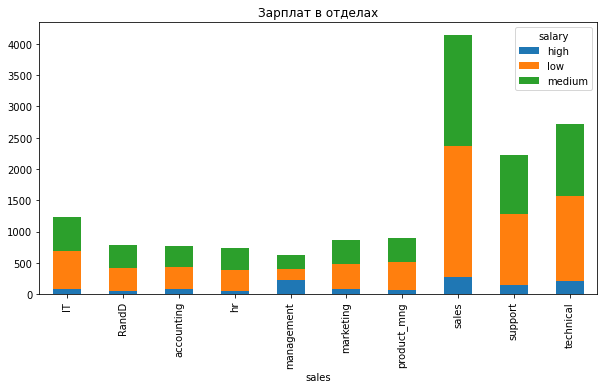

In [17]:
sotrudnikator = pandas.pivot_table(HR_df, values='time_spend_company', columns='sales', index='salary', aggfunc='count')
#del sotrudnikator.columns.name
plt.figure(figsize=(10, 10))
sotrudnikator.plot(stacked=True, kind='bar',figsize=(5,10),title = 'Отделов в ранге зарплат')
sotrudnikator.T.plot(stacked=True, kind='bar',figsize=(10,5),title = 'Зарплат в отделах')
sotrudnikator

9.Сколько сотрудников покинули компанию.

In [18]:
len(HR_df[HR_df['left'] == 1])

3571

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию:
  Сотрудникам мало платят
  Загрузка сотрудников часами 
  Сотрудник косячник

формулируется основная гипотеза H0 и альтернативная гипотеза H1;
выбирается статистический критерий, с помощью которого будет проверяться гипотеза;
задаётся значение уровня значимости α;
находятся границы области принятия гипотезы;
делается вывод о принятии или отвержении основной гипотезы H0.



Загрузка сотрудников часами. Считаем что выборки часов выработки по уводивщшимся и неуволисвшимся связаны.

Шапиро
(0.9728221297264099, 8.605373869418702e-42)
(0.8667358160018921, 0.0)
дАгостино
NormaltestResult(statistic=2531.6228899711937, pvalue=0.0)
NormaltestResult(statistic=17412.20687572199, pvalue=0.0)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


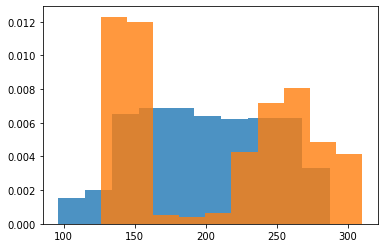

In [51]:
# проверяем на нормальность
print('Шапиро')
print(scipy.stats.shapiro(HR_df[HR_df['left'] == 0]['average_montly_hours']))
print(scipy.stats.shapiro(HR_df[HR_df['left'] == 1]['average_montly_hours']))

print('дАгостино')
print(scipy.stats.normaltest(HR_df[HR_df['left'] == 0]['average_montly_hours']))
print(scipy.stats.normaltest(HR_df[HR_df['left'] == 1]['average_montly_hours']))

plt.hist(HR_df[HR_df['left'] == 0]['average_montly_hours'], density=True, bins=10, alpha=0.8) 
plt.hist(HR_df[HR_df['left'] == 1]['average_montly_hours'], density=True, bins=10, alpha=0.8) 
plt.show()

Имеем 2 независимые количесвтенные выбокри не нормальные. берем тест Манна Уитни

In [53]:
scipy.stats.mannwhitneyu(HR_df[HR_df['left'] == 0]['average_montly_hours'], HR_df[HR_df['left'] == 1]['average_montly_hours'])

MannwhitneyuResult(statistic=19119787.5, pvalue=6.38478299217712e-09)

Вероятность критерия высокая, но значение u критерия какоето заоблачное. Вывод с высокой долей вероятности выборки рабочих часов по уволившимся и не уволившимся не связаны.


Сотрудники долго не работают в компании. Смотрим выборки по time_spend_company


Шапиро
(0.7459031939506531, 0.0)
(0.8371977806091309, 0.0)
дАгостино
NormaltestResult(statistic=4819.210856757333, pvalue=0.0)
NormaltestResult(statistic=449.75869041783585, pvalue=2.1684094024076956e-98)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


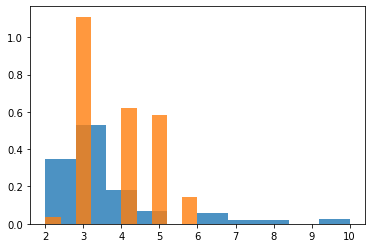

In [59]:
# проверяем на нормальность
print('Шапиро')
print(scipy.stats.shapiro(HR_df[HR_df['left'] == 0]['time_spend_company']))
print(scipy.stats.shapiro(HR_df[HR_df['left'] == 1]['time_spend_company']))

print('дАгостино')
print(scipy.stats.normaltest(HR_df[HR_df['left'] == 0]['time_spend_company']))
print(scipy.stats.normaltest(HR_df[HR_df['left'] == 1]['time_spend_company']))

plt.hist(HR_df[HR_df['left'] == 0]['time_spend_company'], density=True, bins=10, alpha=0.8) 
plt.hist(HR_df[HR_df['left'] == 1]['time_spend_company'], density=True, bins=10, alpha=0.8) 
plt.show()

In [61]:
scipy.stats.ttest_ind(HR_df[HR_df['left'] == 0]['time_spend_company'], HR_df[HR_df['left'] == 1]['time_spend_company'])

Ttest_indResult(statistic=-17.924210234916142, pvalue=4.207680457692835e-71)

p value близко к нулю, t криетрий отрицательный. Это говрит о статистической значимости и верности нулевой гипотезы


Сотрудникам мало платят
Корелляция пирсона должна показать зависимость
Проверим тестами Пирсона, спирмена, кендала

In [24]:
fisher_exact_df = pandas.pivot_table(HR_df, values='sales', columns='left', index='salary', aggfunc='count')
fisher_exact_df

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


Шапиро
(0.7528201937675476, 0.006230269558727741)
(0.9891007542610168, 0.8002466559410095)
дАгостино слишко мало данных


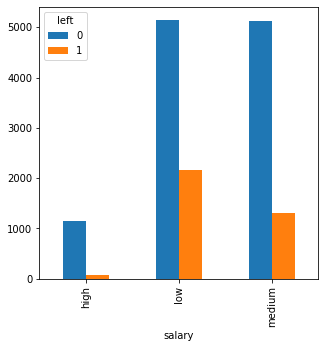

In [70]:
# проверяем на нормальность
print('Шапиро')
print(scipy.stats.shapiro(fisher_exact_df[0]))
print(scipy.stats.shapiro(fisher_exact_df[1]))

print('для дАгостино слишко мало данных')
"""print(scipy.stats.normaltest(fisher_exact_df[0]))
print(scipy.stats.normaltest(fisher_exact_df[1]))"""

fisher_exact_df.plot(stacked=False, kind='bar',figsize=(5,5))


In [72]:
scipy.stats.ttest_ind(fisher_exact_df[0], fisher_exact_df[1])

Ttest_indResult(statistic=1.7947580052970216, pvalue=0.1471332863683946)

Статистическая значимость почти 15% слишком высока и результтаты теста нельзя считать действительными. 